## In this lab we are going to training a NN using PyTorch

PyTorch provides the elegantly designed modules and classes 
- torch.nn
- torch.optim
- Dataset
- DataLoader
to help you create and train neural networks. 
You need to understand exactly what they're doing to fully utilize their power and customize them for your problem.
First of all, have PyTorch installed and get familiar with the basics of tensor operations. (look at the notebook tensor.ipynb in the lab5 folder)
(If you’re familiar with Numpy array operations, you’ll find the PyTorch tensor operations nearly identical)

In [ ]:
#install Pytorch
!pip install torch

PyTorch classes for createing and training neural networks :
- torch.nn
- torch.optim
- Dataset
- DataLoader


In [1]:
import torch

## Dataset

In torchvision library there is a module datasets, that contain some datasets such as MNIST. 
MINST dataset contain handwrittern digits. 

We will use datasets from torchvision to load the MNIST handwritten digits dataset. You can find the list of datasets available on torchvision here. 

In [2]:
import  torchvision.datasets as datasets
print(dir(datasets)) # List of datasets available on torchvision

['CIFAR10', 'CIFAR100', 'CLEVRClassification', 'CREStereo', 'Caltech101', 'Caltech256', 'CarlaStereo', 'CelebA', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'Country211', 'DTD', 'DatasetFolder', 'EMNIST', 'ETH3DStereo', 'EuroSAT', 'FER2013', 'FGVCAircraft', 'FakeData', 'FallingThingsStereo', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'Flowers102', 'FlyingChairs', 'FlyingThings3D', 'Food101', 'GTSRB', 'HD1K', 'HMDB51', 'INaturalist', 'ImageFolder', 'ImageNet', 'Imagenette', 'InStereo2k', 'KMNIST', 'Kinetics', 'Kitti', 'Kitti2012Stereo', 'Kitti2015Stereo', 'KittiFlow', 'LFWPairs', 'LFWPeople', 'LSUN', 'LSUNClass', 'MNIST', 'Middlebury2014Stereo', 'MovingMNIST', 'Omniglot', 'OxfordIIITPet', 'PCAM', 'PhotoTour', 'Places365', 'QMNIST', 'RenderedSST2', 'SBDataset', 'SBU', 'SEMEION', 'STL10', 'SUN397', 'SVHN', 'SceneFlowStereo', 'Sintel', 'SintelStereo', 'StanfordCars', 'UCF101', 'USPS', 'VOCDetection', 'VOCSegmentation', 'VisionDataset', 'WIDERFace', '__all__', '__builtins__', '__cached__',

Now let's take a look at the parameters we set:

root: sets the directory we store and load our data from.
train: indicates whether we want the training dataset or the test dataset.,
transform: allows us to apply transformations to our data; here we are only going to convert the data to a tensor so that it works with PyTorch; however, in future notebooks, you will see more complicated transformations.
The transform attribute indicates the transformation applied to each row of data in the dataset. In the code below, each data point is a PIL image converted to a tensor.

In [3]:
# Download training data from open datasets.
from torchvision.transforms import transforms
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)


print(f"Training data: {training_data}\n")
print(f"Test data: {test_data}")

Training data: Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Test data: Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


As you can see there are 60000 training samples in the training dataset and there are 10000 samples in the test dataset

### Data loader

To make loading and working with the data easier, we are going to use DataLoader from torch.utils.data. The DataLoader takes in a dataset and a batch_size parameter, and allows us to iterate over the dataset. Here we do one iteration just to see the data shapes of the fist batch in test data


In [4]:
from torch.utils.data import DataLoader

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Iterate over the data
for x, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {x.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


As you can see the xs are of shape [64, 1, 28, 28] which means we have a batch of 64 images, each with 1 channel which means the images are grayscale (for example colorful images have 3 channels of red, blue and green or RGB), and of size 28x28 pixels.

Similarly the ys are of shape [64] which means we have a batch of 64 labels. In the next section we will learn more about these labels.



### Visualization

Here we will take a look at single batch of data and visualize it.


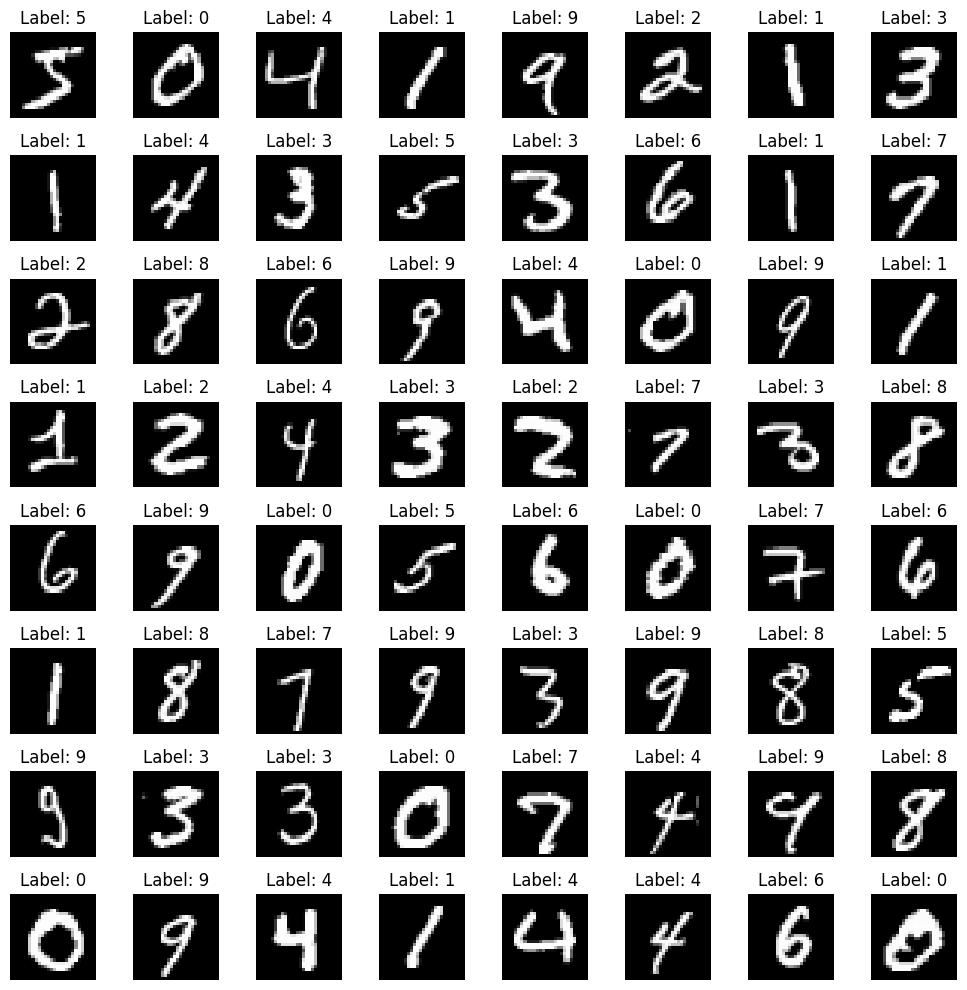

In [5]:
from matplotlib import pyplot as plt

images, labels = next(iter(train_dataloader))

fig, axes = plt.subplots(8,8, figsize=(10,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')

plt.tight_layout()
plt.show()

#visualize(images, labels)

### Device

In [7]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


### Model

Here we define our model. 
Recall that each batch of image has a shape of [64, 1, 28, 28]. F8]. 
For now we only want to use Linear layers so we must flatten the inputs so that we can pass it to the linear layers. The nn.Flatten() module allows us to do this.

The torch.nn.Module class provides a convenient way to create custom nueral network modules.
It includes some key features that are important for building neural networks, such as the ability to keep track of learnable parameters and the ability to perform automatic differentiation (for computing gradients during training).

By creating a new class that inherits from torch.nn.Module, and defining an __init__ method to initialize the module's parameters, and forward method that perform the computation, we can create our own custom module. These custom modules can be used just like any of the built-in PyTorch modules, such as torch.nn.Module or torch.nn.Conv2d, and can be included in a larger model architecture.

Creating a custom module can be useful in many situations. For example, we might create a custom module to implement a novel layer or activation function that is not included in PyTorch's built-in modules. Or we could create a custom module that represents a more complex model, such as a sequence-to-sequence model, composed of multiple layers and other modules.

When creating a custom data model using a custom module in PyTorch, we will need to define a subclass of the torch.nn.Module class and define the __init__() and forward() methods.

- init__(): The __init__ method is used to initialize the module's parameters. This method is called when the module is created, and it allows we to set up any internal state that the module needs. For example, we might use this method to initialize the weights of a neural network or to create other modules that the module needs in order to function.
- forward(): The forward method is used to perform the computation that the module represents. This method takes in one or more input tensors, performs computations on them, and returns the output tensors. It is a forward pass of the module.


### create the module :
In this step, we define a custom module called NeuralNetwork by creating a new class that inherits from the nn.Module base class. 
In the __init__ method, define the architecture of the model by creating the necessary layers.
Here, we create :
- a flatten layer (A flatten layer is used to convert a multi-dimensional tensor (like a 2D or 3D array) into a 1D vector. This is typically done before passing data to fully connected (dense) layers, which expect 1D input.)
- nn.Sequential is a convenience class in PyTorch that allows you to build neural networks by stacking layers in a sequential order. It simplifies the process of defining models where data flows through layers linearly, one after the other.


- The layers in sequential layer :
    - nn.Linear : a fully connected (dense) layer. It performs a linear transformation on its input.
    - nn.Relu : is an activation function in PyTorch that stands for Rectified Linear Unit.

### Defining the forward pass
Here we define the forward pass of the model within the class by implementing the forward method. In this example, the input is passed through the first linear layer, then a relu activation function is applied to it, and then it is passed through the second linear layer.


In [8]:
from torch import nn

class NueralNetwork(nn.Module) :
    def __init__(self) :
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self,x) :
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


### initialize our model

In [10]:
model = NueralNetwork().to(device)
print(model)

NueralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Loss Function

Since we are trying to classify the handwritten digits, we are going to use the cross entropy loss. You can see the list of loss functions in PyTorch here (https://docs.pytorch.org/docs/stable/nn.html#loss-functions)

In [11]:
loss_fn = nn.CrossEntropyLoss()

### Optimizer

Next we need to setup an optimizer for training our model. We use stochastic gradient descent so we must use the SGD module from torch.optim. We must pass the model.parameters() to the SGD optimizer and set its learning rate lr=1e-3. You can learn about the optimizers available on PyTorch here (https://docs.pytorch.org/docs/stable/optim.html)

In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

### Training
To train the model we first set the number of epochs. For each epoch we then iterate over the entire training data and update the model parameters. For each batch of data, we must first move the data to same device as the network, then we predict the output of the model, calculate the loss, perform backward pass, update parameters, and reset the gradients.

To monitor training, we use trange from tqdm which performs similar to range but allows us to have a progress bar pbar which lets us display useful information.

In [17]:
from tqdm import trange

# Number of epochs we wish to train the model
n_epochs = 30

for _ in (pbar := trange(n_epochs)):
    # Iterate over the data
    for x, y in train_dataloader:
        # Move the datapoints to same device as the model
        x, y = x.to(device), y.to(device)
        # Clear the gradients
        optimizer.zero_grad()
        # Predict the output and perform the forward pass
        pred = model(x)
        # Compute prediction error
        loss = loss_fn(pred, y)
        # Backpropagation
        loss.backward()
        # Update the model weights
        optimizer.step()
        # Update the progress bar
        pbar.set_description(f'Loss = {loss.item():.3f}')

Loss = 0.176: 100%|█████████████████████████████| 30/30 [19:40<00:00, 39.36s/it]


### Evaluation
Finally we can evaluate the trained model. We will start by evaluating the model on the test dataset. Here we use torch.no_grad() since we don't need the gradients. We iterate over the entire test dataset and print the accuracy of our model on this dataset.

In [ ]:
# Store the number of correctly classified and total labels
correct, total = 0, 0

# Disable gradient calculation
with torch.no_grad():
    # Iterate over the test data
    for x, y in test_dataloader:
        # Move the datapoints to same device as the model
        x, y = x.to(device), y.to(device)
        # Predict the output
        logits = model(x)
        # Get the predicted label
        pred = torch.argmax(logits, axis=1)
        # Update the number of correclty classified labels
        correct += sum(pred == y).item()
        # Update the number of total labels
        total += pred.shape[0]

print(f'Accuracy: {100 * correct / total:.2f}%')

Let's visuzlie a batch to compare the predictions and the true labels.

In [ ]:
images, labels = next(iter(test_dataloader))
preds = torch.argmax(model(images.to(device)), axis=1).cpu()

visualize_predictions(images, labels, preds)

To get a better sense of our model, we can plot it's confusion matrix.

In [ ]:
plot_conf_mat(model, test_dataloader, device)

### Experiments

Here we will take a look at different optimizers and how they affect training and convergence. 
test the SGD, AdaGrad, RMSProb and Adam functions on the MNIST dataset (for 20 epochs) and plot the loss and accuracy for each batch and compare the different functions

### MedMNIST 
a large-scale MNIST-like dataset collection of standardized biomedical images, including 12 datasets for 2D and 6 datasets for 3D.
or more information from this dataset see : 
- https://www.nature.com/articles/s41597-022-01721-8
- https://medmnist.com/#:~:text=Covering%20primary%20data%20modalities%20in,regression%20and%20multi%2Dlabel).


In [20]:
#install MedMNIST using the instruction bellow
# pip install --upgrade git+https://github.com/MedMNIST/MedMNIST.git

use the cell bellow to read data from MedMNIST

In [25]:
from medmnist import PneumoniaMNIST

train_data = PneumoniaMNIST(split='train', transform=transforms.ToTensor(), download=True)
val_data = PneumoniaMNIST(split='val', transform=transforms.ToTensor(), download=True)
test_data = PneumoniaMNIST(split='test', transform=transforms.ToTensor(), download=True)

print(train_data)



100%|███████████████████████████████████████| 4.17M/4.17M [00:06<00:00, 634kB/s]


Using downloaded and verified file: /home/mansoori/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/mansoori/.medmnist/pneumoniamnist.npz
Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: /home/mansoori/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0


- visualize the first batch of data
- train a NN model
- plot the loss and accuracy for 20 epochs
- test the model